### Evaluating Model With Newly srapped data from NYT

Evaluated my classifer on real New york times articles for the following time periods:

Time Periods:
- March 2020 to Dec 2021
- 2016
- 2000
- 1969
- 1852
- 1851 (The year the NYtimes started)

In [300]:
import os
import string
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model

from sklearn.metrics import confusion_matrix
import itertools

import warnings
warnings.filterwarnings("ignore")

In [298]:
##Helper functions
def plot_confusion_matrix(true, pred, classes = ['No Sarcasm', "Sarcasm"], 
                         normalize = False,
                         title="Confusion Matrix",
                         cmap=plt.cm.Blues):
    
    cm = confusion_matrix(true, pred)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm= cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix, without normalization")
        
    print(cm)
    
    thresh = cm.max() / 2. 
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i,j],
                horizontalalignment='center',
                color='white' if cm[i, j] > thresh else "black")
        
        plt.tight_layout()
        plt.ylabel("True Label")
        plt.xlabel("Predicted label")
        
        
def get_percent(pred):
    uniques, counts = np.unique(pred, return_counts=True)
    percentages = dict(zip(uniques,counts * 100 / len(pred)))
    return print(percentages)
    
def token_cleaning(text):
    
    #dataprep
    tokens = text.split(" ")
    #Lowercasing words
    tokens = [token.lower() for token in tokens]
    #Removing Punctuation
    table = str.maketrans('','', string.punctuation + "’")
    tokens = " ".join([token.translate(table) for token in tokens]) 
    ## Encode numbers with digit_token
    tokens = re.sub(r'\d+', "digit_token", str(tokens))
    
    return tokens

def clean_df(df):
    df = df.drop("Unnamed: 0", axis = 1)
    df = df.drop_duplicates()
    df = df.dropna()
    df.headlines = df.headlines.apply(token_cleaning)
    
    return df

def predict(text):
    
    sequence = tokenizer.texts_to_sequences(text)
    sequence = pad_sequences(sequence, maxlen=20)
    prediction = loaded_model.predict(sequence, batch_size = 512,
                                     verbose=1)
    
    return prediction

def predict_hard(text):
    
    sequence = tokenizer.texts_to_sequences(text)
    sequence = pad_sequences(sequence, maxlen=20)
    prediction = loaded_model.predict_classes(sequence, batch_size = 512,
                                     verbose=1)
    
    return prediction

def evaluate(data, title):
    
    data = clean_df(data)
    
    pred = predict_hard(data.headlines)
    
    print('\n')
    get_percent(pred)
    print('\n')
    
    true = np.ones(pred.shape)
    
    return plot_confusion_matrix(true,pred, title = title)

In [292]:
#Initialize the model
loaded_model = load_model("API_setup/models/LSTM_classifier_V1/")

# loading our tokenizer
with open('API_setup/tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

### Evaluating the various time periods

190/190 [==============================] - 2s 10ms/step


{0: 84.24192552972639, 1: 15.758074470273606}


Confusion Matrix, without normalization
[[    0     0]
 [81900 15320]]


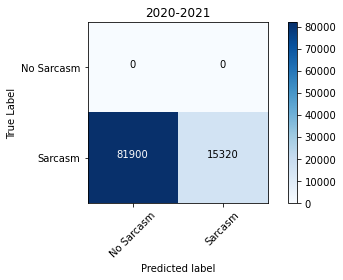

In [301]:
data_2021_2020 = pd.read_csv((os.path.join(os.path.abspath(".."), "data/", 
                                           "nyt_headlines0320-1221.csv")))
evaluate(data_2021_2020, "2020-2021")

131/131 [==============================] - 1s 11ms/step


{0: 81.69958108916816, 1: 18.300418910831837}


Confusion Matrix, without normalization
[[    0     0]
 [54608 12232]]


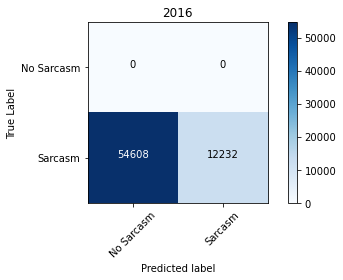

In [304]:
data_2016 = pd.read_csv((os.path.join(os.path.abspath(".."), "data/", 
                                           "nyt_headlines2016.csv")))
evaluate(data_2016, "2016")

170/170 [==============================] - 2s 10ms/step


{0: 64.95415598512668, 1: 35.045844014873325}


Confusion Matrix, without normalization
[[    0     0]
 [56249 30349]]


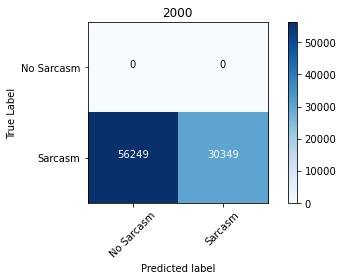

In [305]:
data_2000 = pd.read_csv((os.path.join(os.path.abspath(".."), "data/", 
                                           "nyt_headlines2000.csv")))
evaluate(data_2000, "2000")

196/196 [==============================] - 2s 11ms/step


{0: 61.66858285428643, 1: 38.33141714571357}


Confusion Matrix, without normalization
[[    0     0]
 [61684 38341]]


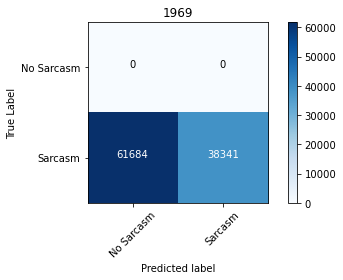

In [306]:
data_1969 = pd.read_csv((os.path.join(os.path.abspath(".."), "data/", 
                                           "nyt_headlines1969.csv")))
evaluate(data_1969, "1969")

18/18 [==============================] - 0s 15ms/step


{0: 72.03052422030524, 1: 27.969475779694758}


Confusion Matrix, without normalization
[[   0    0]
 [6513 2529]]


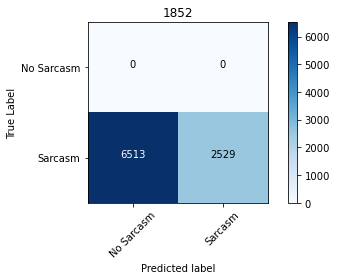

In [307]:
data_1852 = pd.read_csv((os.path.join(os.path.abspath(".."), "data/", 
                                           "nyt_headlines1852.csv")))
evaluate(data_1852, "1852")

6/6 [==============================] - 0s 24ms/step


{0: 73.90461419154711, 1: 26.09538580845289}


Confusion Matrix, without normalization
[[   0    0]
 [1906  673]]


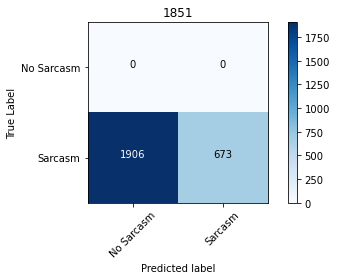

In [308]:
data_1851 = pd.read_csv((os.path.join(os.path.abspath(".."), "data/", 
                                           "nyt_headlines1851.csv")))
evaluate(data_1851, "1851")

In [11]:
df = pd.read_csv('data_clean.csv')

## API post request testing

In [312]:
import requests as r
import json


In [313]:
test_string = ["the roseanne revival catches up to our thorny"]

In [316]:
url = "http://127.0.0.1:5000/predict"

url = "http://ec2-15-222-46-142.ca-central-1.compute.amazonaws.com:8000/predict"

response = r.post(url, json = test_string)

ConnectionError: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))

In [ ]:
print(response.json())